In [1]:
import pandas as pd
from konlpy.tag import Okt
from gensim.models import word2vec
import nltk # national language tool kit
import matplotlib.pyplot as plt
from wordcloud import WordCloud

t = Okt()

In [2]:
# train_data불러오기
train = pd.read_csv("../../Data/train_data.csv")

In [3]:
train_list = []
for i in range(0, 80):
    train_list.append(train['가사'][i])

In [4]:
len(train_list)

80

In [5]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

---
# 명사 토큰

In [6]:
# train_malist

In [7]:
# 텍스를 한 줄씩 처리하기
twitter = Okt()
results4 = []
lines = train_list
for line in lines:
    # 형태소 분석하기
    train_malist = twitter.pos(line,norm=True,stem=True) # 단어의 기본형 사용
    r = []
    for word in train_malist:
        # 어미, 조사, 구두점 등은 대상에서 제외
        if not word[1] in ["Josa","Eomi","Punctuation"]:
            if word[1] in ["Noun"]:
                if word[0] != "n":
                    r.append(word[0]) # word[0] : data
    rl4 = (" ".join(r).strip())
    
    results4.append(rl4)
    #print(rl)

In [8]:
token_list4 = str(results4).split(" ")

In [9]:
# 명사갯수 (중복포함)
len(token_list4)

6680

In [10]:
# 불용어 추가
stop_words4 = ['내','너','네','우리','널','그대','넌','곳','나','수',"속","젠","게","알","해","거","미","일","우린","니","젠","때","알","걸"\
                "두","손","눈","것","이","두","볼","어디","하나요","아무","길","좀","뒤","척","안","마","모두","여기","건","비","품","번","줄"\
                ,"난난","살","그","더","난","사람","걸","'너","나나","땐","적","저기","채","입","그것","위","해도","수가","둘",\
                "듯","수',","사랑',","롤","요","저","감","'사랑","다시',","라면","은","뭐","땜","워","준","불","뿐","서서","순","울",\
                "우릴","남","발","춤","일도","란","전","온","중","말',","대도","만","낼","빈","오지","덜","방","무","진","투","드","돌",\
                "바랬는데","빗","오","보","거지","후","핀","잡","부시","거더","알',","게',","'혼자","수도","우리둘","래야","통해","'하루",\
                "애","아들","더욱더","전하","무엇","끝내기","티","겉","헤어지자","사이',","'나","'내","더',","굽","녹","테","세","'오늘",\
                "것',","'그대","그대',","너',","날',","친구","내겐","단","다가","누가","듯이","안고","물","활","첫","목","픈","바","몇",\
                "쉬","철","나라","죽","찬","지고","나로","감고","보이","운","다한","룰","식이","이면","날수","남지","만이","째깍","번이","날"
                ]
token_ko4 = [each_word for each_word in token_list4 if each_word not in stop_words4]
ko4 = nltk.Text(token_ko4)

- 명사의 경우 명사의 갯수가 1개인 경우가 총 402번이였으며 특수기호 포함이 가장 많이 들어있음을 확인하고 1번 사용된 명사는 토큰에서 제외

In [11]:
testing = []
for key, val in zip(list(ko4.vocab().keys()),list(ko4.vocab().values())):
    if val < 10:
        testing.append([key,val])

In [12]:

len(testing)

661

In [13]:
testing2 = []
for i in range(len(testing)):
    testing2.append(str(testing[i][0]))

In [14]:
# 1번 사용된 언어 지운후 다시 확인
token_ko5 = set(ko4.vocab()) - set(testing2)
token_ko6 = [each_word for each_word in token_list4 if each_word in token_ko5]
ko6 = nltk.Text(token_ko6)
ko6.vocab().most_common(500)

[('사랑', 204),
 ('말', 133),
 ('왜', 69),
 ('이별', 68),
 ('생각', 62),
 ('맘', 54),
 ('다시', 53),
 ('밤', 52),
 ('시간', 50),
 ('못', 49),
 ('이제', 46),
 ('마음', 44),
 ('보고', 43),
 ('오늘', 39),
 ('기억', 36),
 ('혼자', 35),
 ('그때', 33),
 ('끝', 32),
 ('눈물', 32),
 ('곁', 30),
 ('모습', 30),
 ('하루', 30),
 ('추억', 30),
 ('또', 30),
 ('모든', 29),
 ('정말', 29),
 ('혹시', 28),
 ('서로', 26),
 ('그날', 25),
 ('지금', 25),
 ('처음', 24),
 ('매일', 22),
 ('가슴', 22),
 ('세상', 22),
 ('꼭', 22),
 ('순간', 19),
 ('바람', 19),
 ('자꾸', 18),
 ('하나', 18),
 ('잠', 17),
 ('항상', 17),
 ('햇살', 16),
 ('멀리', 16),
 ('그게', 15),
 ('그냥', 15),
 ('후회', 15),
 ('다른', 14),
 ('전부', 14),
 ('노래', 14),
 ('그땐', 14),
 ('잡고', 13),
 ('사이', 13),
 ('소리', 13),
 ('남아', 13),
 ('만큼', 13),
 ('꿈', 12),
 ('노력', 12),
 ('사실', 12),
 ('조금', 12),
 ('마지막', 11),
 ('늘', 11),
 ('준비', 11),
 ('바보', 11),
 ('그녀', 11),
 ('술잔', 11),
 ('자꾸만', 10),
 ('반짝', 10),
 ('약속', 10),
 ('이해', 10),
 ('상처', 10)]

In [15]:
# 명사 토큰 갯수 (중복제외)
len(list(ko6.vocab()))

70

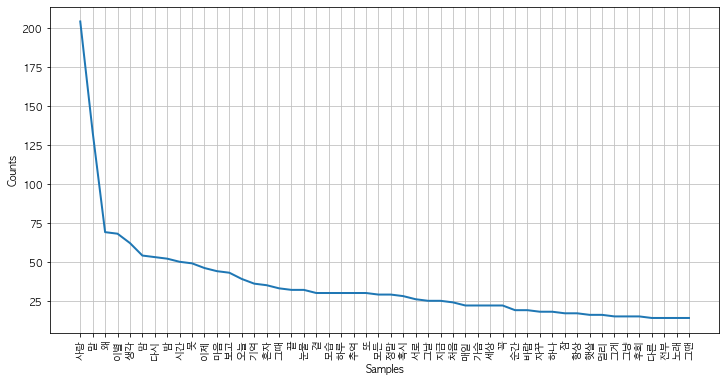

In [16]:
# 상위 50개의 빈도수 차트 만들기
plt.figure(figsize=(12,6))
ko6.plot(50)
plt.show()

In [17]:
# 상위 100개만 wordcloud로 그리기
# 구한데이터로 그리기
data4 = ko6.vocab().most_common(100)

# 딕셔너리로 만들기
tmp_data4 = dict(data4)

wordcloud4 = WordCloud(
    background_color='White',
    relative_scaling=0.8,
    font_path="AppleGothic" 
).generate_from_frequencies(tmp_data4)

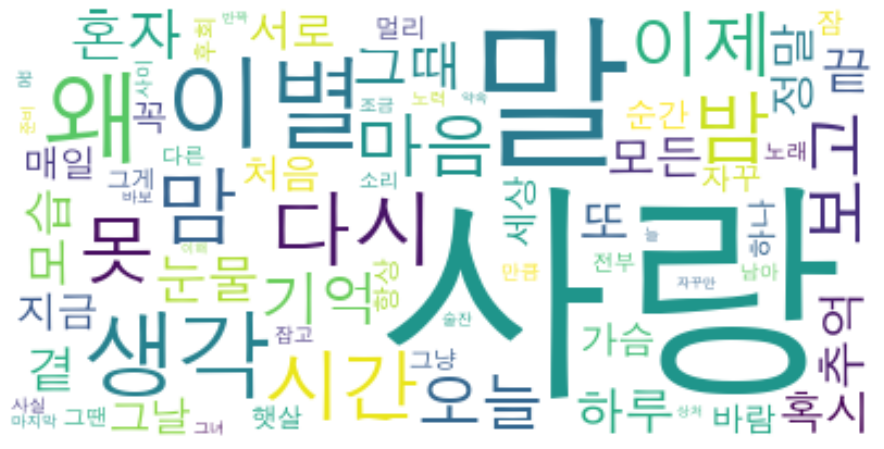

In [18]:
plt.figure(figsize=(16,8))
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis('off')
plt.show()

---
# 추출한 토큰 확인하기

In [19]:
# 명사 토큰
print("명사토큰 : \n",list(ko6.vocab())," =>명사 토큰 갯수 : ",len(list(ko6.vocab())))

명사토큰 : 
 ['사랑', '말', '왜', '이별', '생각', '맘', '다시', '밤', '시간', '못', '이제', '마음', '보고', '오늘', '기억', '혼자', '그때', '끝', '눈물', '곁', '모습', '하루', '추억', '또', '모든', '정말', '혹시', '서로', '그날', '지금', '처음', '매일', '가슴', '세상', '꼭', '순간', '바람', '자꾸', '하나', '잠', '항상', '햇살', '멀리', '그게', '그냥', '후회', '다른', '전부', '노래', '그땐', '잡고', '사이', '소리', '남아', '만큼', '꿈', '노력', '사실', '조금', '마지막', '늘', '준비', '바보', '그녀', '술잔', '자꾸만', '반짝', '약속', '이해', '상처']  =>명사 토큰 갯수 :  70


In [21]:
token_sum = list(ko6.vocab())

---
# 토큰 one hot

In [22]:
from tensorflow import keras

- 가사 데이터 okt로 분류하기

In [23]:
# 텍스를 한 줄씩 처리하기
twitter = Okt() 
okt_result = []
lines = train['가사']
for line in lines:
    # 형태소 분석하기
    train_malist = twitter.pos(line,norm=True,stem=True) # 단어의 기본형 사용
    r = []
    for word in train_malist:
        if word[1] in ["Verb","Noun"]:
            if word[0] != "n":
                r.append(word[0])
    rl3 = (" ".join(r).strip())
    
    okt_result.append(rl3)
    # print(rl3)

In [24]:
# 동사와 명사로 분리가 잘 되었는지 확인하기
okt_result[0]

'처음 널 만나다 대화 사랑 빠지다 우린 손 마주 잡고 도시 거닐다 비 오다 골목 어귀 발 멈추다 바라보다 입 맞추다 모르다 어둠 오다 밝다 빛나다 별빛 아래 음악 취해 서로 기대다 멈추다 버리다 시간 속 우리 둘이서 영원 하다 너 곁 눈 감 때 잊다 하다 서로 품 안고 온기 느끼다 날 잠 들다 때 비추다 햇살 가끔 우린 다른 모습 말 멈추다 침묵 오다 때 마음 다투다 보다 오직 둘 알다 말 미소 되다 멈추다 버리다 시간 속 우리 둘이서 영원 하다 너 곁 눈 감 때 널 처음 마주 순간 알 수 나르다 보다 지다 그 미소 그게 내 부란 걸 내 마음 담다 너 고백 하다 영원 나르다 안다 너 곁 눈 감 때 눈 감 때 눈 감 때'

In [25]:
# 인덱스 0은 없는 단어와 padding으로 집어 넣기 나머지 단어들은 1부터 순차적으로 인덱스 부여

word_to_index = {word[0] : index + 1 for index, word in enumerate(token_sum)}
word_to_index['pad'] = 0 # 패딩용 인덱스 0
word_to_index['unk'] = 0 # unknown 용 인덱스 0


# 기존 훈련 데이터에서 각 단어를 고유한 정수로 부여
encoded = []
for line in okt_result: #입력 데이터에서 1줄씩 문장을 읽음
    temp = []
    for w in line: #각 줄에서 1개씩 글자를 읽음
      try:
        temp.append(word_to_index[w]) # 글자를 해당되는 정수로 변환
      except KeyError: # 단어 집합에 없는 단어일 경우 unk로 대체된다.
        temp.append(word_to_index['unk']) # unk의 인덱스로 변환

    encoded.append(temp)

In [26]:
print((encoded[0]))

[31, 0, 0, 0, 0, 55, 0, 47, 0, 0, 0, 0, 58, 0, 0, 0, 30, 47, 0, 0, 0, 0, 0, 0, 60, 0, 0, 51, 0, 0, 0, 9, 0, 0, 0, 47, 0, 0, 0, 14, 47, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 23, 47, 0, 63, 0, 13, 47, 0, 0, 0, 0, 23, 47, 0, 25, 0, 47, 0, 0, 0, 0, 14, 47, 0, 0, 47, 0, 0, 0, 47, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 28, 0, 0, 15, 0, 47, 0, 0, 23, 47, 0, 0, 0, 47, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 69, 28, 0, 0, 0, 0, 39, 47, 0, 0, 0, 20, 0, 19, 0, 0, 0, 0, 0, 0, 47, 0, 39, 47, 0, 28, 0, 0, 0, 0, 0, 0, 0, 0, 15, 0, 0, 0, 47, 0, 0, 0, 40, 0, 0, 47, 0, 0, 0, 0, 23, 47, 0, 42, 0, 0, 33, 0, 0, 0, 0, 0, 47, 0, 0, 25, 0, 0, 2, 0, 0, 23, 47, 0, 0, 0, 0, 14, 47, 0, 0, 0, 60, 0, 0, 47, 0, 47, 0, 13, 47, 0, 14, 0, 0, 0, 0, 0, 47, 0, 2, 0, 0, 53, 0, 0, 47, 0, 0, 23, 47, 0, 0, 0, 47, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 69, 28, 0, 0, 0, 0, 39, 47, 0, 0, 0, 20, 0, 19, 0, 0, 0, 0, 0, 0, 0, 31, 0, 0, 60, 0, 0, 36, 0, 0, 0, 0, 0, 0, 0, 0, 47, 0, 13, 47, 0, 30, 47, 0, 64, 0, 0, 53, 0, 64, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 60, 

---
# 전체 길이 padding작업

In [27]:
import matplotlib.pyplot as plt

가사의 최대 길이 : 558
가사의 최소 길이 : 184
가사의 평균 길이 : 349.300000


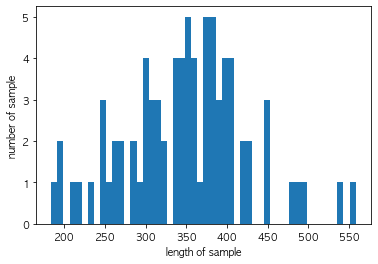

In [28]:
# 정해줄 길이를 찾기 위해 가장 긴 리뷰 길이 확인
max_length = max(len(l) for l in encoded)
print('가사의 최대 길이 : %d' % max_length)
print('가사의 최소 길이 : %d' % min(len(l) for l in encoded))
print('가사의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [29]:
# 문장마다 단어 갯수가 다르므로 sequence padding을 넣어서 문장의 길이 동일하게 만들기 
# 이거하려고 위에서 단어갯수 체크한거임

padding_paragraphs_encoding = keras.preprocessing.sequence.pad_sequences(encoded, maxlen=max_length, padding='post')
padding_paragraphs_encoding

array([[31,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [64,  0,  0, ...,  0,  0,  0],
       [16, 66,  0, ...,  0,  0,  0],
       [ 0,  0, 47, ...,  0,  0,  0]], dtype=int32)

In [30]:
print(len(list(padding_paragraphs_encoding)), len(list(padding_paragraphs_encoding)[1]))

80 558


In [31]:
# 분류항목['happy', 'sad', 'regret', 'indifference']를 수치로 변경하기
categories = train['감정'].to_list()

def category_encoding(category):
    if category == 'happy':
        return 0
    elif category == 'sad':
        return 1
    elif category == 'regret':
        return 2
    else:
        return 3

In [32]:
encoded_category = [category_encoding(category) for category in categories]
encoded_category[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [33]:
len(encoded_category)

80

---
# 가사 감정 RNN model

In [34]:
# train test data 만들기
from sklearn.model_selection import train_test_split


train_input, test_input, train_target, test_target = train_test_split(
    padding_paragraphs_encoding, encoded_category, test_size=0.2
)

In [35]:
# train val data 만들기
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2
)

In [36]:
import warnings
from tensorflow import keras 

# GPU 사용 설정
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = '3'

warnings.filterwarnings('ignore')

In [37]:
print(train_input.shape, val_input.shape)

(51, 558) (13, 558)


In [44]:
model = keras.Sequential()
# 문맥 생성 단계
model.add(keras.layers.SimpleRNN(64, input_shape=(558, 71),dropout=0.1))
model.add(keras.layers.Dense(4, activation='softmax')) # 문장은 확률값을 구해야하므로

In [45]:
import numpy as np

In [46]:
train_oh = keras.utils.to_categorical(train_input)
train_oh.shape

(51, 558, 71)

In [47]:
print(np.sum(train_oh[0][0]))

1.0


In [48]:
val_oh = keras.utils.to_categorical(val_input)
val_oh.shape

(13, 558, 71)

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 64)                8704      
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
Total params: 8,964
Trainable params: 8,964
Non-trainable params: 0
_________________________________________________________________


In [50]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-3)
model.compile(
    optimizer=rmsprop,
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
    )

checkpoint_cb = keras.callbacks.ModelCheckpoint("Data/best-train_rnn-model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=5,
    restore_best_weights= True
)

history = model.fit(
    np.array(train_oh),
    np.array(train_target),
    epochs=500,
    #batch_size=64, # mini batch 경사 하강법
    validation_data = (np.array(val_oh), np.array(val_target)),
    # callbacks = [checkpoint_cb, early_stopping_cb]
)

Epoch 1/500
2/2 [==============================] - 1s 294ms/step - loss: 1.4787 - accuracy: 0.2745 - val_loss: 1.4873 - val_accuracy: 0.3846
Epoch 2/500
2/2 [==============================] - 0s 54ms/step - loss: 1.3839 - accuracy: 0.3529 - val_loss: 1.5299 - val_accuracy: 0.3846
Epoch 3/500
2/2 [==============================] - 0s 54ms/step - loss: 1.4154 - accuracy: 0.1961 - val_loss: 1.6061 - val_accuracy: 0.0769
Epoch 4/500
2/2 [==============================] - 0s 54ms/step - loss: 1.4018 - accuracy: 0.2549 - val_loss: 1.4720 - val_accuracy: 0.3846
Epoch 5/500
2/2 [==============================] - 0s 54ms/step - loss: 1.3425 - accuracy: 0.2941 - val_loss: 1.4384 - val_accuracy: 0.3846
Epoch 6/500
2/2 [==============================] - 0s 54ms/step - loss: 1.3709 - accuracy: 0.3333 - val_loss: 1.4326 - val_accuracy: 0.3846
Epoch 7/500
2/2 [==============================] - 0s 54ms/step - loss: 1.3911 - accuracy: 0.2549 - val_loss: 1.4573 - val_accuracy: 0.1538
Epoch 8/500
2/2 [==

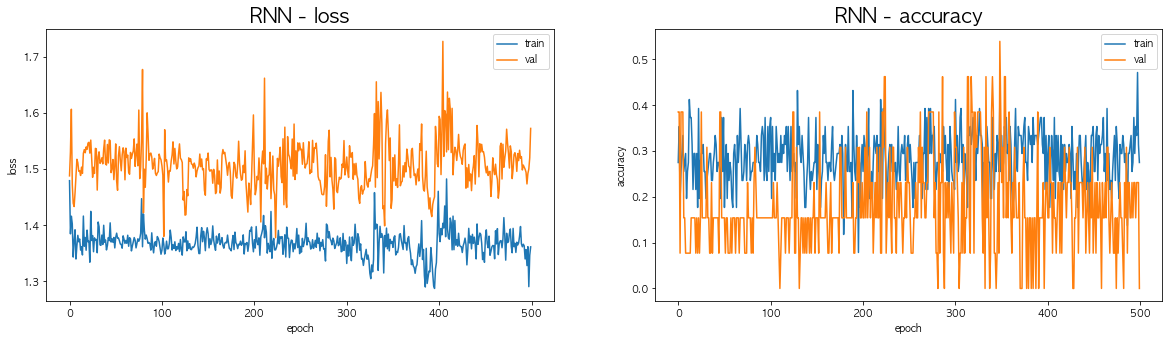

In [51]:
# 시각화 해보기
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(1,2,1) # 1행 2열의 첫번째다.
ax2 = fig.add_subplot(1,2,2) # 1행 2열의 두번째다.

ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])

ax1.set_xlabel('epoch')
ax2.set_xlabel('epoch')

ax1.set_ylabel('loss')
ax2.set_ylabel('accuracy')

ax1.legend(['train','val'])
ax2.legend(['train','val'])


ax1.set_title("RNN - loss", size=20)
ax2.set_title("RNN - accuracy", size=20)
plt.show()

---
# 가사 감정 LSTM

In [67]:
# model = keras.Sequential()

# model.add(keras.layers.Embedding(max_length, 16, input_length=100))
# model.add(keras.layers.LSTM(8, dropout=0.3)) # 8개의 셀을 사용한다, 드롭아웃 0.3 넣기
# model.add(keras.layers.Dense(4, activation='softmax'))

# model.summary()

In [68]:
# # 훈련하기
# # rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
# model.compile(
#     optimizer='adam', 
#     loss='sparse_categorical_crossentropy', 
#     metrics ='accuracy'
#     ) 

# checkpoint_cb = keras.callbacks.ModelCheckpoint("Data/best-train-lstm-model.h5")
# early_stopping_cb = keras.callbacks.EarlyStopping(
#     patience = 3,
#     restore_best_weights = True
# )

# history = model.fit(
#     np.array(train_input),
#     np.array(train_target),
#     epochs=100, # RNN에서 제일 작은게 100임.
#     batch_size = 64,  # mini batch 경사하강법
#     validation_data = (np.array(val_input), np.array(val_target)),
#     callbacks = [checkpoint_cb, early_stopping_cb]
# )